# **CASE STUDY ON NEURAL NETWORK AND HYPER PARAMETER TUNING**


You are provided with a csv file (magic_gamma_telescope04.csv) dataset which
contains telescopic experiment data.
Using the features given in the dataset, you need to
classify the outcome - CLASS.
1. Prepare a model to classify "**class**" using neural networks combined with any HP parameter tuning.
2. Expected: f1 score = 70% and accuracy = 75%.

You can make use of any preprocessing activities if needed.
No external data shall be added for increasing evaluation metric values

In [1]:
# Loading Directories
import tensorflow as tf
import keras

# Loading Supporting Directories
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing dataset
df = pd.read_csv('/content/magic_gamma_telescope04_.csv')
df.head(10)

,flength,fwidth,fsize,fconc,fconc1,fsym,fm3long,fm3trans,falpha,dist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
5,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
6,48.2468,17.3565,3.0332,0.2529,0.1515,8.5730,38.0957,10.5868,4.7920,219.0870,g
7,26.7897,13.7595,2.5521,0.4236,0.2174,29.6339,20.4560,-2.9292,0.8120,237.1340,g
8,96.2327,46.5165,4.1540,0.0779,0.0390,110.3550,85.0486,43.1844,4.8540,248.2260,g
9,46.7619,15.1993,2.5786,0.3377,0.1913,24.7548,43.8771,-6.6812,7.8750,102.2510,g


### PREPROCESSING

In [3]:
df.describe()

,flength,fwidth,fsize,fconc,fconc1,fsym,fm3long,fm3trans,falpha,dist
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


In [4]:
df.describe(include='object')

,class
count,19020
unique,2
top,g
freq,12332


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   flength   19020 non-null  float64
 1   fwidth    19020 non-null  float64
 2   fsize     19020 non-null  float64
 3   fconc     19020 non-null  float64
 4   fconc1    19020 non-null  float64
 5   fsym      19020 non-null  float64
 6   fm3long   19020 non-null  float64
 7   fm3trans  19020 non-null  float64
 8   falpha    19020 non-null  float64
 9   dist      19020 non-null  float64
 10  class     19020 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


In [6]:
# missing values check
df.isna().sum()

flength     0
fwidth      0
fsize       0
fconc       0
fconc1      0
fsym        0
fm3long     0
fm3trans    0
falpha      0
dist        0
class       0
dtype: int64

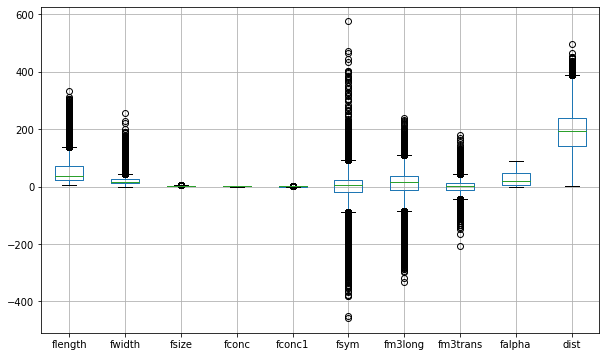

In [7]:
df.boxplot(figsize =(10,6))

There are a lot of outliers. Applying Standardization

In [8]:
# defining data into input and output
X = df.drop('class', axis=1).values
y = df['class'].values

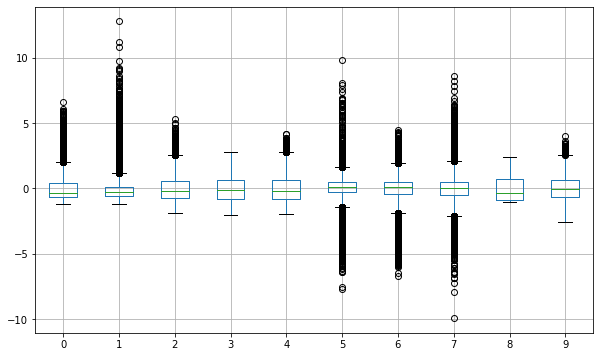

In [9]:
# Standardization
from sklearn.preprocessing import StandardScaler
a = StandardScaler()
a.fit(X)
X_standardized = a.transform(X)
X = pd.DataFrame(X_standardized)
# Check for outliers after Standardisation
X.boxplot(figsize =(10,6))

There are still outliers present, we are trying Normalisation 

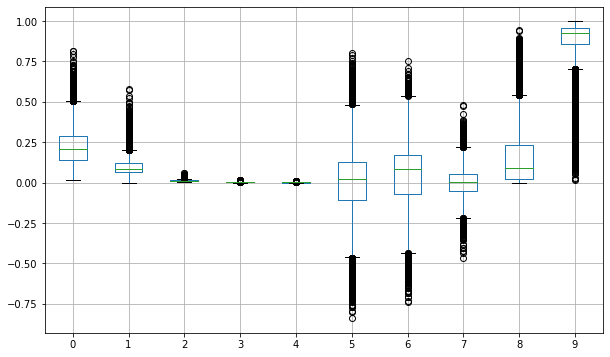

In [10]:
# Normalization
X = df.drop('class', axis=1)
from sklearn.preprocessing import Normalizer
a = Normalizer()
a.fit(X)
X_ = a.transform(X)
X = pd.DataFrame(X_)
# Check for outliers after Standardisation
X.boxplot(figsize =(10,6))

Normalization seems to have a greater impact so we proceed with this step

In [11]:
# Encoding the output
from sklearn.preprocessing import LabelEncoder
# creating instance
le = LabelEncoder()
# fitting
le.fit(y)
y_ = le.transform(y)
y = pd.DataFrame(y_)

In [12]:
# importing train test split
from sklearn.model_selection import train_test_split
# Splitting data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13314, 10), (5706, 10), (13314, 1), (5706, 1))

### MODEL BUILDING

We will first find the best parameters for hyperparameter tuning using Keras_Tuner

### **KERAS TUNER**

In [15]:
# Installing Keras Tuner
!pip install keras_tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 4.3 MB/s 
     |████████████████████████████████| 1.6 MB 34.4 MB/s 


In [54]:
# Importing Keras Tuner
import keras_tuner as kt
from tensorflow import keras

In [76]:
# Defining the model
def model_builder(hp):
  model = keras.Sequential()
  #input layer
  #model.add(keras.layers.Flatten(input_shape=(10,)))
  model.add(keras.layers.Dense(10))

  #Dense hidden layer 
  hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
  model.add(keras.layers.Dense(units=hp_units, activation='relu'))

  #Output layer
  model.add(keras.layers.Dense(1,activation='sigmoid'))

  # Compiling Model
  hp_learning_rate = hp.Choice('learning_rate', values = [0.01,0.02])


  model.compile(optimizer=keras.optimizers.SGD(learning_rate=hp_learning_rate, momentum=0.02),
                loss=keras.losses.CategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
  return model

Instantiate the tuner and perform hypertuning
4 tuners: RandomSearch, Hyperband, BayesianOptimization, Sklearn

In [77]:
tuner = kt.Hyperband(model_builder, objective='val_accuracy')

Define early stopping 

create a callback to stop the training of the tuner early after a certain value of validation loss is achieved



In [72]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [78]:
#run the hyperparameter search

tuner.search(X_train, y_train, epochs=20, batch_size = 5, validation_split=0.2, callbacks=[stop_early])

In [79]:
#get the optimal hyperparamters

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

#number of nodes in the hidden layer
#learning rate

print(f"""The Hyperparameter search is complete.
The optimal number of units is {best_hps.get('units')} and the optimal learning rate is {best_hps.get('learning_rate')}""")

The Hyperparameter search is complete.
The optimal number of units is 192 and the optimal learning rate is 0.001


Build or train the model again with the optimal combination

In [80]:
model = tuner.hypermodel.build(best_hps)

newmodel = model.fit(X_train, y_train, epochs=20, batch_size = 5,validation_split=0.2)

Epoch 1/20
2131/2131 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.6475 - val_loss: nan - val_accuracy: 0.6493
Epoch 2/20
2131/2131 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.6476 - val_loss: nan - val_accuracy: 0.6493
Epoch 3/20
2131/2131 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.6476 - val_loss: nan - val_accuracy: 0.6493
Epoch 4/20
2131/2131 [==============================] - 5s 2ms/step - loss: nan - accuracy: 0.6476 - val_loss: nan - val_accuracy: 0.6493
Epoch 5/20
2131/2131 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.6476 - val_loss: nan - val_accuracy: 0.6493
Epoch 6/20
2131/2131 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.6476 - val_loss: nan - val_accuracy: 0.6493
Epoch 7/20
2131/2131 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.6476 - val_loss: nan - val_accuracy: 0.6493
Epoch 8/20
2131/2131 [============

In [81]:
#find the best number of epochs on the basis of validation accuracy

val_acc_per_epoch = newmodel.history['val_accuracy']

best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1

print('Best Epoch', best_epoch)

Best Epoch 1


In [82]:
#train the model again

hypermodel = tuner.hypermodel.build(best_hps)

hypermodel.fit(X_train, y_train, epochs=best_epoch, batch_size=5, validation_split=0.2)

2131/2131 [==============================] - 5s 2ms/step - loss: nan - accuracy: 0.6364 - val_loss: nan - val_accuracy: 0.6493


In [83]:
test_loss, test_acc = hypermodel.evaluate(X_test, y_test)

print(test_acc)

179/179 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.6493
0.6493164896965027


### **KERAS CLASSIFIER**

In [13]:
from sklearn.model_selection import cross_val_score
# Importing accuracy and f1 score
from sklearn.metrics import accuracy_score, f1_score

In [67]:
!pip install scikeras 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [69]:
# Creating the model
model = keras.Sequential()
#input layer
model.add(keras.layers.Dense(10))

#Dense hidden layer 
model.add(keras.layers.Dense(128, activation='relu'))

#Output layer
model.add(keras.layers.Dense(1,activation='sigmoid'))

# Compiling Model
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.2),
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

In [88]:
# importing Keras Classifier
from scikeras.wrappers import KerasClassifier
# creating an instance for the model
ann = KerasClassifier(build_fn=model, random_state=42,
                      batch_size= 5,
                      epochs = 25)

In [89]:
# fitting the Keras Classifier model
kcm = ann.fit(X_train,y_train)
# predicting the output
y_pred = kcm.predict(X_test)
#Accuracy score and F1 score
print('Accuracy score of Keras Classifier Model : ',accuracy_score(y_test,y_pred))
print('f1 score of Keras Classifier Model       : ',f1_score(y_test,y_pred))

Epoch 1/25
2663/2663 [==============================] - 6s 2ms/step - loss: nan - accuracy: 0.6480
Epoch 2/25
2663/2663 [==============================] - 6s 2ms/step - loss: nan - accuracy: 0.6480
Epoch 3/25
2663/2663 [==============================] - 5s 2ms/step - loss: nan - accuracy: 0.6480
Epoch 4/25
2663/2663 [==============================] - 5s 2ms/step - loss: nan - accuracy: 0.6480
Epoch 5/25
2663/2663 [==============================] - 5s 2ms/step - loss: nan - accuracy: 0.6480
Epoch 6/25
2663/2663 [==============================] - 5s 2ms/step - loss: nan - accuracy: 0.6480
Epoch 7/25
2663/2663 [==============================] - 5s 2ms/step - loss: nan - accuracy: 0.6480
Epoch 8/25
2663/2663 [==============================] - 5s 2ms/step - loss: nan - accuracy: 0.6480
Epoch 9/25
2663/2663 [==============================] - 5s 2ms/step - loss: nan - accuracy: 0.6480
Epoch 10/25
2663/2663 [==============================] - 5s 2ms/step - loss: nan - accuracy: 0.6480
Epoch 11/